In [42]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

##
from TwitterSearch import *
import matplotlib.pyplot as plt
import collections,sys,math 

##
import json
from collections import defaultdict
import networkx as nx
import numpy as np

In [43]:
data = json.load(open('outputfile.json'))

# Top 10 reweet

In [44]:
data_small = []
dictionary_retweet = {}
for t in range(len(data)):
    n_retweet = data[t]['retweet_count']
    
    if n_retweet > 0:
        try:
            dictionary_retweet[data[t]['retweeted_status']['id']] = n_retweet
        except:
            dictionary_retweet[data[t]['id']] = n_retweet
            
        data_small += [data[t]]

In [45]:
top_10 = [w for w in sorted(dictionary_retweet, key=dictionary_retweet.get, reverse=True)[:10]]
   # print (w, dictionary_retweet[w])

In [46]:
find_id = []
tweets = []

for i in range(len(data_small)):
    if len(set(find_id)) < 10:
        try:
            if data_small[i]['retweeted_status']['id'] in top_10:
         
                if data_small[i]['retweeted_status']['id'] not in find_id:
                    find_id += [data_small[i]['retweeted_status']['id']]
                    tweets += [(data_small[i]['text'], data_small[i]['retweet_count'], data_small[i]['retweeted_status']['user']['name'], data_small[i]['retweeted_status']['user']['id'], data_small[i]['retweeted_status']['user']['followers_count'], data_small[i]['retweeted_status']['user']['friends_count'])]
        except:
            if data_small[i]['id'] in top_10:
                if data_small[i]['id'] not in find_id:
                    find_id += [data_small[i]['id']]
                    tweets += [(data_small[i]['text'], data_small[i]['retweet_count'], data_small[i]['user']['name'], data_small[i]['user']['id'], data_small[i]['user']['followers_count'], data_small[i]['user']['friends_count'])]
    else: break

In [47]:
retweet_output_dict = {}
for t, rt, u, uid, fol, frien in tweets:
    retweet_output_dict[t] = {}
    retweet_output_dict[t]['num_RT'] = rt
    retweet_output_dict[t]['user'] = u
    retweet_output_dict[t]['user_id'] = uid
    retweet_output_dict[t]['user_followers'] = fol
    retweet_output_dict[t]['user_friends'] = frien

In [48]:
retweet_output_dict

{'RT @GianniCuperIoPD: Dopo il discorso di #Renzi abbiamo perso un altro 5%.\n#elezioni2018': {'num_RT': 701,
  'user': 'Gianni Kuperlo',
  'user_followers': 36159,
  'user_friends': 1695,
  'user_id': 1566553698},
 'RT @GiorgiaMeloni: A #Livorno i centri sociali ci impediscono persino di passeggiare nella piazza. \nEcco la DEMOCRAZIA di cui parlano tanto…': {'num_RT': 915,
  'user': 'Giorgia Meloni ن',
  'user_followers': 646804,
  'user_friends': 689,
  'user_id': 130537001},
 'RT @GiorgiaMeloni: Insulti e bottigliate dai centri sociali di #Livorno, questa è la sinistra che vuole dare lezioni di democrazia\nhttps://…': {'num_RT': 456,
  'user': 'Giorgia Meloni ن',
  'user_followers': 646805,
  'user_friends': 689,
  'user_id': 130537001},
 'RT @LiveSpinoza: Di Maio sta già consultando il tutorial di Aranzulla su come si governa un paese.\n#elezioni2018\n[@Mordicchio90]': {'num_RT': 1375,
  'user': 'Spinoza LIVE',
  'user_followers': 107652,
  'user_friends': 64,
  'user_id': 87036240

# Top 10 users

In [49]:
count_user_tweet = defaultdict(int)
for i in range(len(data)):
    count_user_tweet[data[i]['user']['id']] += 1

In [50]:
top_10 = [w for w in sorted(count_user_tweet, key=count_user_tweet.get, reverse=True)[:10]]

In [51]:
top_10

[700879460845760512,
 633831925,
 815549036,
 397148046,
 2364101904,
 267220891,
 701796846952386560,
 2348285916,
 1011283068,
 314488804]

In [52]:
find_id = []
info_user = {}

for i in range(len(data)):
    
    if data[i]['user']['id'] in top_10:
        if len(set(find_id)) < 10:
            info_user[data[i]['user']['id']] = {}
            info_user[data[i]['user']['id']]['followers_count'] = data[i]['user']['followers_count']
            info_user[data[i]['user']['id']]['favourites_count'] = data[i]['user']['favourites_count']
            info_user[data[i]['user']['id']]['description'] = data[i]['user']['description']
            info_user[data[i]['user']['id']]['location'] = data[i]['user']['location']
            info_user[data[i]['user']['id']]['name'] = data[i]['user']['name']
            info_user[data[i]['user']['id']]['lang'] = data[i]['user']['lang']

        find_id += [data[i]['user']['id']]

In [53]:
info_user

{267220891: {'description': 'Quotidiano online gratuito: tutto sulla tua città e sulla tua provincia con un semplice click. Seguici!',
  'favourites_count': 4,
  'followers_count': 3970,
  'lang': 'it',
  'location': 'Livorno',
  'name': 'QuiLivorno.it'},
 314488804: {'description': "@ #Pisa, Leaning News All Around The Tower - All'ombra della Torre le Notizie che non ti aspetti. Stay Connected! Author: @binowsky",
  'favourites_count': 7223,
  'followers_count': 6021,
  'lang': 'it',
  'location': 'Pisa, Toscana',
  'name': 'PisaConnection'},
 397148046: {'description': '#Livorno, blog di politica ed economia interamente dedicato alla città Livorno',
  'favourites_count': 538,
  'followers_count': 1255,
  'lang': 'it',
  'location': 'Livorno',
  'name': 'Livorno Times Blog'},
 633831925: {'description': 'Il canale ufficiale della mobilità in Toscana. 7 giorni su 7, dalle 7 alle 20 #viabiliTOS\nPolicy: https://t.co/3Nxfc2MjVT',
  'favourites_count': 11048,
  'followers_count': 7870,
  

# Lingua

In [54]:
data_small = []
dictionary_lang = {}
for t in range(len(data)):
    dictionary_lang[t] = data[t]['lang']
    
    
    try:
        dictionary_lang[t] = data[t]['retweeted_status']['lang']
    except:
        dictionary_lang[t] = data[t]['lang']
            
        data_small += [data[t]]

In [56]:
import collections

In [57]:
counter_lingua = collections.Counter(list(dictionary_lang.values()))

# Numero tweet nel tempo

In [135]:
list_date = []
for i in range(len(data)):
    
    list_date += [data[i]['created_at']]
    
    try:
        list_date += [data[i]['retweeted_status']['created_at']]
    except: continue

In [136]:
ts = pd.to_datetime(list_date)

In [184]:
df = pd.DataFrame()

In [185]:
df['Time'] = ts
df['freq'] = [1]*len(ts)

# Groupby 

## Hours

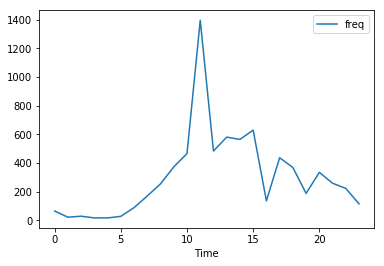

In [192]:
df.index = df['Time']
df.groupby(df.index.hour).sum().plot()

In [193]:
df = pd.DataFrame()
df['Time'] = ts
df['freq'] = [1]*len(ts)
df.set_index('Time', inplace=True)

In [194]:
df = df.groupby(pd.TimeGrouper(level='Time', freq='60T'))['freq'].agg('sum')   


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


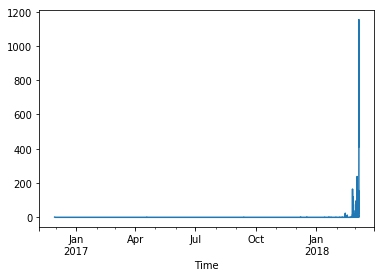

In [195]:
df.plot()